##### Apply unsupervised learning technique to segment the market based on customer shopping habits

##### The inpul file 'sales.csv' contains the sales details of a variety of tops from a number of retail clothing stores. The goal is to identify the patterns and segment the market based on the number of units sold in these sotres.

In [34]:
import csv
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Load data from input file

input_file = 'sales.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter = ',')

X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[1:]
        continue
    
    X.append([float(x) for x in row[1:]])
    
# Convert to numpy array
X = np.array(X)

In [35]:
# Estimating the bandwidth of input data
bandwidth = estimate_bandwidth(X, quantile = 0.8, n_samples = len(X))

# Compute clustering with MeanShift
meanshift_model = MeanShift(bandwidth, bin_seeding = True)
meanshift_model.fit(X)

MeanShift(bandwidth=26006.389359024277, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [36]:
# Extract labels and the centers of each cluster

labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

In [44]:
# Print the number of clusters and cluster centers

print("\n Number of clusters in input data = ", num_clusters)
print("\n Centers of clusters: ")
print('\t'.join([name[:3] for name in names]))

for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))


 Number of clusters in input data =  9

 Centers of clusters: 
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
28333	34263	24065	5575	4229	18076
14987	46397	97393	1127	37315	3235
22617	77873	32543	1005	21035	837
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
7852	4939	63081	134	40066	1332


In [45]:
# Extract 2 features for visualization
cluster_centers_2d = cluster_centers[:, 1:3]

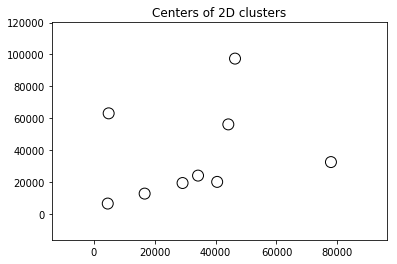

In [50]:
# Plot the cluster centers
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1], s = 120, edgecolor = 'black', facecolor = 'none')

offset = 0.25
plt.xlim(cluster_centers_2d[:,0].min() - offset * cluster_centers_2d[:,0].ptp(), cluster_centers_2d[:,0].max() + offset * cluster_centers_2d[:,0].ptp())
plt.ylim(cluster_centers_2d[:,1].min() - offset * cluster_centers_2d[:,1].ptp(), cluster_centers_2d[:,1].max() + offset * cluster_centers_2d[:,1].ptp())

plt.title('Centers of 2D clusters')
plt.show()